In [1]:
from base import Stock,Portfolio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

In [2]:
import yfinance as yf
class yahoo_stock(object):

    """
    Fetching stock data from yahoo finance
    
    API Document: 
    - https://github.com/ranaroussi/yfinance
    - https://pypi.org/project/fix-yahoo-finance/0.1.0/
    ---
    Require:
    - yfinance

    """
    def __init__(self,symbol):
        self._symbol = symbol
        self._ticker = self._getStock(symbol)
    

    # getter and setter
    @property
    def ticker(self):
        return self._ticker

    @property
    def symbol(self):
        return self._symbol

    @symbol.setter
    def symbol(self, symbol):
        self._symbol = symbol
        self._ticker = yf.Ticker(symbol)
    
    def _getStock(self, symbol):
        ticker = yf.Ticker(symbol)
        return ticker

    def getCompanyInfo(self):
        return self.ticker.info

    """
    Historical Data
    ---
    Input:
    symbol: string
    period: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    (default is '1mo')
    start_date, end_date: String, "%Y-%m-%d", eg "2020-02-20"
    ---
    Return:
    date, open, high, low, close, volume, dividends, stock splits
    """

    def getHistoricalByPeriod(self, period = '1mo'):
        return self.ticker.history(period)

    def getHistoricalByRange(self, start_date, end_date):
        return self.ticker.history(start = start_date, end = end_date)

    def getActions(self):
        return self.ticker.actions

    def getDividends(self):
        return self.ticker.dividends

    def getSplits(self):
        return self.ticker.splits

    def getSustainability(self):
        return self.ticker.sustainability

    def getRecommendations(self):
        return self.ticker.recommendations

    def getNextEvent(self):
        return self.ticker.calendar

    def getCashFlow(self):
        return self.ticker.cashflow

    def getAdditionalInfo(self):
        pass

In [3]:
df = pd.read_csv('../../Data/aapl_stock_extract.csv')
df2 = pd.read_csv('../../Data/googl_stock_extract.csv')

stock = Stock('aapl',df)
stock2 = Stock('googl',df2)

port = Portfolio([stock,stock2])
port.make_technical_indicator('High','mvg10','moving_average',1,50,windowSize = 10)
port.make_technical_indicator('High','fft','fast_fourier',1,50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [4]:
port.get_portfolio_dataFrame()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,mvg10_High,fft_High,symbol
0,2020-06-11,349.31,351.06,335.48,335.90,50415600,0,0,NaN,7665.170000-0.000000j,aapl
1,2020-06-12,344.72,347.80,334.22,338.80,50001500,0,0,NaN,-12.228740+112.181804j,aapl
2,2020-06-15,333.25,345.68,332.58,342.99,34702200,0,0,NaN,-9.608158+102.499180j,aapl
3,2020-06-16,351.46,353.20,344.72,352.08,41357200,0,0,NaN,-21.085420+25.076961j,aapl
4,2020-06-17,355.15,355.40,351.09,351.59,28532000,0,0,NaN,-27.155557+43.479841j,aapl
5,2020-06-18,351.41,353.45,349.22,351.73,24205100,0,0,NaN,-0.699405+26.112222j,aapl
6,2020-06-19,354.64,356.56,345.15,349.72,66119000,0,0,NaN,-14.092881+6.575197j,aapl
7,2020-06-22,351.34,359.46,351.15,358.87,33861300,0,0,NaN,-16.960000+10.426946j,aapl
8,2020-06-23,364.00,372.38,362.27,366.53,53038900,0,0,NaN,-7.319302-7.162303j,aapl
9,2020-06-24,365.00,368.79,358.52,360.06,48155800,0,0,356.378,-24.826700+3.805626j,aapl


In [5]:
stockIndicators = {
    'aapl':['Close','mvg10_High'],
    'googl':['Open']
}
port.plot(stockIndicators,samePlot = True)

TypeError: Index(...) must be called with a collection of some kind, None was passed

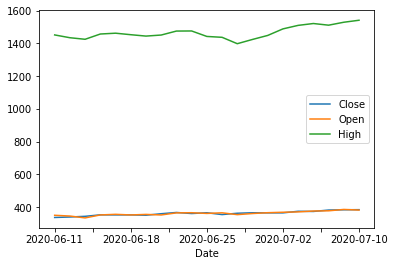

In [6]:
x = stock.df[['Date','Close']].set_index('Date')
y = stock.df[['Date', 'Open']].set_index('Date')
w = stock2.df[['Date','High']].set_index('Date')
df = [x,y,w]

z = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), df)
# z = pd.merge(x,y, left_on= 'Date',right_on='Date')
z
z.plot()

In [7]:
def expand_dataFrame_by_category(df,indexCol,keyCol):
        keys = df[keyCol].unique()
        tmpDf = None
        for ix,k in enumerate(keys):
            if ix == 0:
                tmpDf = df[self.df[keyCol]==k]
                tmpDf = tmpDf.set_index(indexCol)
                tmpDf = tmpDf.drop(keyCol,axis=1)
                tmpDf.columns = list(map(lambda x: f'{x}_{k}',tmpDf.columns))
            else:
                df2 = df[df[keyCol]==k]
                df2 = df2.drop(keyCol,axis=1).set_index(indexCol)
                df2.columns = list(map(lambda x: f'{x}_{k}',df2.columns))
                tmpDf = tmpDf.join(df2,how='outer')
        return tmpDf

stockIndicators = {
    'aapl':['Close','mvg10_High'],
    'googl':['Open']
}


x = port.stockDict['aapl'].df[stockIndicators['aapl']]
x.insert(0,"Date",port.stockDict['aapl'].df['Date'])


In [11]:
x = []
for ix,i in enumerate(stockIndicators):
    print(stockIndicators[i])
    print(i)
    x.extend([f'{i}_{d}' for d in stockIndicators[i]])
x

['Close', 'mvg10_High']
aapl
['Open']
googl


['aapl_Close', 'aapl_mvg10_High', 'googl_Open']